## DHIVYA BHARATHI
## GITHUB link: https://github.com/dhivyabharathi001/Spark-foundation-Tasks
## SPARK FOUNDATION INTERNSHIP
## TASK 6:
# Create the Decision Tree classifier and visualize it graphically.
# The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Import the Data

In [2]:
# Reading data from remote link
data = pd.read_csv(r"C:\Users\Dhivya Bharathi\Downloads\Iris.csv")

In [3]:
data.drop(['Id'], axis = 1, inplace = True)

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Visualization

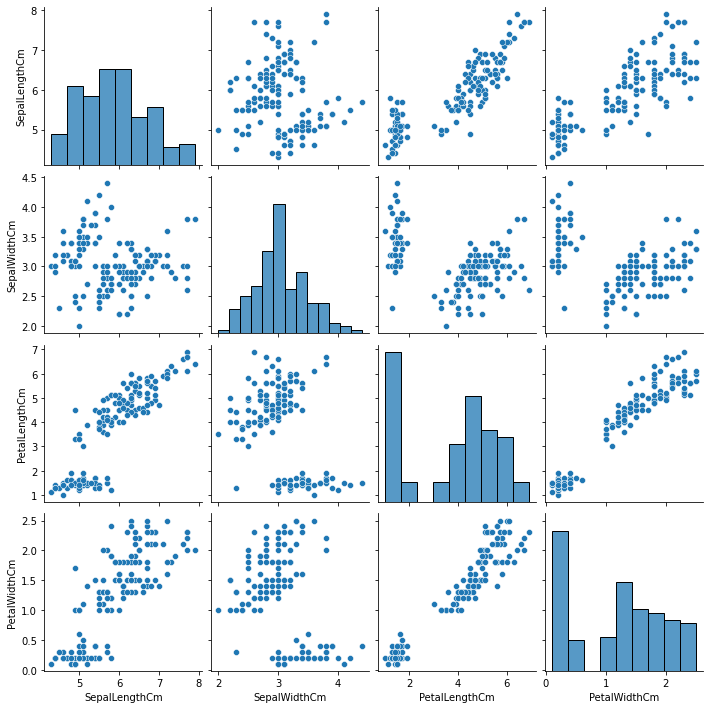

In [6]:
sns.pairplot(data)

# Data splitting

In [7]:
x = data.drop(columns = 'Species')
y = data['Species']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state= 355)

# Decision Tree Classifier model

In [9]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
feature_name

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Visualization of Decision Tree

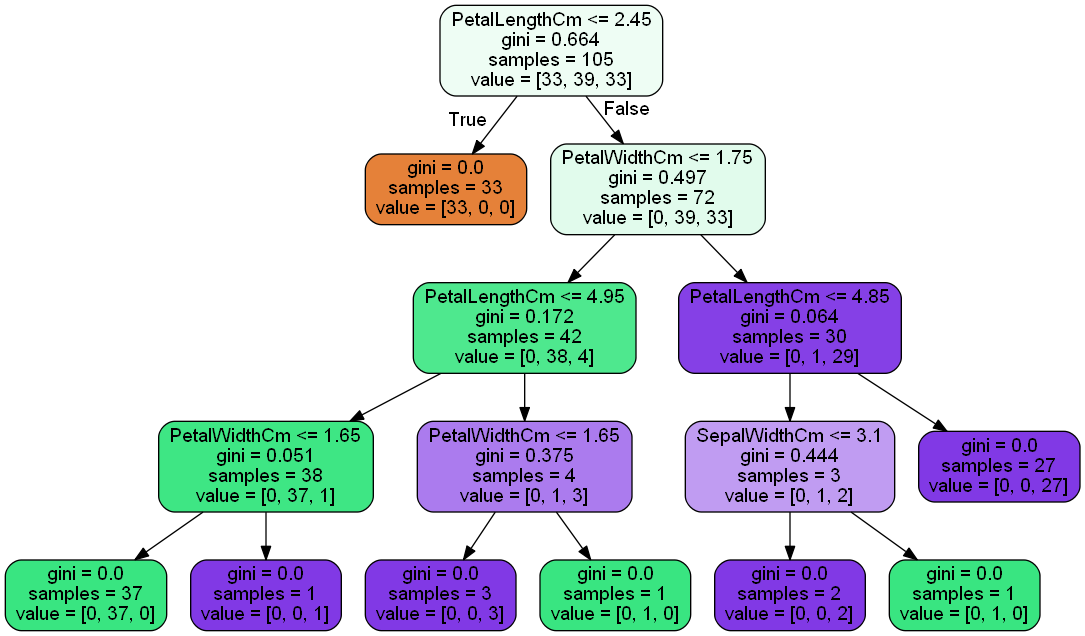

In [11]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

# Accuracy

In [12]:
clf.score(x_train,y_train)

1.0

In [13]:
py_pred = clf.predict(x_test)

In [14]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.9777777777777777

# Prediction for new values

In [15]:
yf = clf.predict([[2,3.2,4,5.5]])
print(yf)

['Iris-versicolor']


In [16]:
yf = clf.predict([[2.4,2.2,4.5,5.5]])
print(yf)

['Iris-virginica']
